Estatísticas do Grafo:
num_vertices: 4
num_arestas: 2
num_arcos: 2
vertices_requeridos: 1
arestas_requeridas: 1
arcos_requeridos: 1
densidade: 0.3333333333333333
grau_minimo: 1
grau_maximo: 2
caminho_medio: 5.833333333333333
diametro: 12


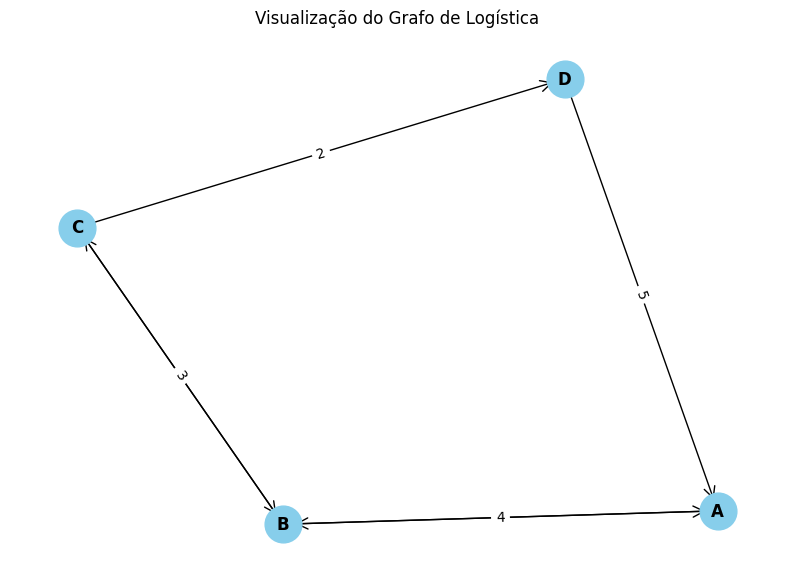

In [ ]:
from grafosTrab import GrafoLogistica
import matplotlib.pyplot as plt
import networkx as nx
import os

def visualizar_grafo_de_arquivo(arquivo):
    grafo = GrafoLogistica()

    try:
        grafo.carregar_de_arquivo(arquivo)
    except Exception as e:
        print(f"❌ Erro ao carregar o arquivo {arquivo}: {e}")
        return

    print(f"📂 Grafo carregado de: {arquivo}")

    estat = grafo.estatisticas()
    print("\n📊 Estatísticas do Grafo:")
    for chave, valor in estat.items():
        print(f"  {chave}: {valor}")

    G = nx.DiGraph()
    for u in grafo.adjacente:
        for v, peso in grafo.adjacente[u]:
            G.add_edge(u, v, weight=peso)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 7))
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    titulo = os.path.basename(arquivo).replace('.dat', '')
    plt.title(f\"Visualização do Grafo: {titulo}\")
    plt.axis('off')
    plt.show()
